In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

In [ ]:
# Load Bag of Words selected features
bow_features = pd.read_csv('/content/drive/MyDrive/SMA_Project/raw/bow_selected_features.csv')

# Load TF-IDF selected features
tfidf_features = pd.read_csv('/content/drive/MyDrive/SMA_Project/raw/tfidf_selected_features.csv')

# Load reduced GloVe embeddings
glove_features = pd.read_csv('/content/drive/MyDrive/SMA_Project/raw/glove_features.csv')

# Verify the shapes
print("BoW Features Shape:", bow_features.shape)
print("TF-IDF Features Shape:", tfidf_features.shape)
print("GloVe Features Shape:", glove_features.shape)

BoW Features Shape: (12790, 100)
TF-IDF Features Shape: (12790, 100)
GloVe Features Shape: (12790, 100)


In [ ]:
# Load labels
labels = pd.read_csv('/content/drive/MyDrive/SMA_Project/raw/labels.csv')

# Verify the shape
print("Labels Shape:", labels.shape)


Labels Shape: (12790, 1)


In [ ]:
from sklearn.model_selection import train_test_split

# Function to split data
def split_data(features, labels, test_size=0.2, random_state=42):
    return train_test_split(features, labels, test_size=test_size, random_state=random_state, stratify=labels)


In [ ]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Models for sparse data (BoW and TF-IDF)
sparse_models = {
    'Naive Bayes': MultinomialNB(),
    'SVM': LinearSVC(max_iter=10000),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Models for dense data (GloVe)
dense_models = {
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(kernel='rbf', probability=True),
    'Random Forest': RandomForestClassifier(random_state=42)
}


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate


def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    report = classification_report(y_true, y_pred, target_names=['False', 'True'])
    cm = confusion_matrix(y_true, y_pred)
    return accuracy, precision, recall, f1, report, cm


In [ ]:
# Initialize an empty list to store results
results = []

# Function to train and evaluate models
def train_and_evaluate_models(feature_type, X_train, X_test, y_train, y_test, models):
    print(f"\n=== Modeling with {feature_type} Features ===")
    scoring = ['accuracy', 'precision', 'recall', 'f1']
    for model_name, model in models.items():
        print(f"\nTraining {model_name} with cross-validation...")
        # Perform cross-validation on training data
        cv_results = cross_validate(model, X_train, y_train, cv=5, scoring=scoring, return_train_score=False, n_jobs=-1)
        # Compute average cross-validation metrics
        cv_accuracy = np.mean(cv_results['test_accuracy'])
        cv_precision = np.mean(cv_results['test_precision'])
        cv_recall = np.mean(cv_results['test_recall'])
        cv_f1 = np.mean(cv_results['test_f1'])
        # Train the model on the entire training data
        model.fit(X_train, y_train)
        # Predict on test data
        y_pred = model.predict(X_test)
        # Evaluate on test data
        test_accuracy, test_precision, test_recall, test_f1, report, cm = evaluate_model(y_test, y_pred)
        # Print evaluation metrics
        print(f"\n{model_name} with {feature_type} Features")
        print("Cross-Validation Metrics:")
        print("Accuracy:", cv_accuracy)
        print("Precision:", cv_precision)
        print("Recall:", cv_recall)
        print("F1 Score:", cv_f1)
        print("\nTest Metrics:")
        print("Accuracy:", test_accuracy)
        print("Precision:", test_precision)
        print("Recall:", test_recall)
        print("F1 Score:", test_f1)
        # Append results
        results.append({
            'Model': model_name,
            'Feature_Type': feature_type,
            'CV_Accuracy': cv_accuracy,
            'CV_Precision': cv_precision,
            'CV_Recall': cv_recall,
            'CV_F1_Score': cv_f1,
            'Test_Accuracy': test_accuracy,
            'Test_Precision': test_precision,
            'Test_Recall': test_recall,
            'Test_F1_Score': test_f1
        })


In [ ]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow = split_data(bow_features, labels)
train_and_evaluate_models('BoW', X_train_bow, X_test_bow, y_train_bow, y_test_bow, sparse_models)



=== Modeling with BoW Features ===

Training Naive Bayes with cross-validation...


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Naive Bayes with BoW Features
Cross-Validation Metrics:
Accuracy: 0.6108302878446439
Precision: 0.6269732910574227
Recall: 0.746933206039499
F1 Score: 0.6813212688552721

Test Metrics:
Accuracy: 0.6086786551993745
Precision: 0.6280048076923077
Recall: 0.7323055360896986
F1 Score: 0.6761565836298933

Training SVM with cross-validation...


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



SVM with BoW Features
Cross-Validation Metrics:
Accuracy: 0.6138593015265407
Precision: 0.6142775037227849
Recall: 0.8268469757225894
F1 Score: 0.7048182864051273

Test Metrics:
Accuracy: 0.6121970289288506
Precision: 0.6122870418172431
Recall: 0.831114225648213
F1 Score: 0.7051129607609988

Training Random Forest with cross-validation...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Random Forest with BoW Features
Cross-Validation Metrics:
Accuracy: 0.5823900794668401
Precision: 0.59685102060135
Recall: 0.7740963698233798
F1 Score: 0.6739562712344526

Test Metrics:
Accuracy: 0.5777951524628616
Precision: 0.593029490616622
Recall: 0.775052557813595
F1 Score: 0.6719319562575942


In [ ]:
# Split data and train/evaluate models for TF-IDF features
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = split_data(tfidf_features, labels)
train_and_evaluate_models('TF-IDF', X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf, sparse_models)



=== Modeling with TF-IDF Features ===

Training Naive Bayes with cross-validation...


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Naive Bayes with TF-IDF Features
Cross-Validation Metrics:
Accuracy: 0.602717230135797
Precision: 0.5909615805832888
Recall: 0.9344542148942996
F1 Score: 0.7240212924328367

Test Metrics:
Accuracy: 0.5949960906958561
Precision: 0.5870824053452116
Recall: 0.9236159775753329
F1 Score: 0.7178649237472767

Training SVM with cross-validation...


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



SVM with TF-IDF Features
Cross-Validation Metrics:
Accuracy: 0.6147387804005671
Precision: 0.6124302202612343
Recall: 0.8420958356804414
F1 Score: 0.7091030475481992

Test Metrics:
Accuracy: 0.617670054730258
Precision: 0.6148337595907929
Recall: 0.8423265592151367
F1 Score: 0.7108219988172679

Training Random Forest with cross-validation...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Random Forest with TF-IDF Features
Cross-Validation Metrics:
Accuracy: 0.572615433691438
Precision: 0.5973381862341536
Recall: 0.7169630290202316
F1 Score: 0.651642602981269

Test Metrics:
Accuracy: 0.5699765441751369
Precision: 0.5966883500887049
Recall: 0.7070777855641205
F1 Score: 0.6472097498396407


In [ ]:
# Split data and train/evaluate models for GloVe features
X_train_glove, X_test_glove, y_train_glove, y_test_glove = split_data(glove_features, labels)
train_and_evaluate_models('GloVe', X_train_glove, X_test_glove, y_train_glove, y_test_glove, dense_models)



=== Modeling with GloVe Features ===

Training Naive Bayes with cross-validation...


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Naive Bayes with GloVe Features
Cross-Validation Metrics:
Accuracy: 0.587080537954358
Precision: 0.6327244630109935
Recall: 0.6184713688640715
F1 Score: 0.6255001951218477

Test Metrics:
Accuracy: 0.5953870211102423
Precision: 0.6420289855072464
Recall: 0.6208829712683952
F1 Score: 0.6312789454934093

Training SVM with cross-validation...


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



SVM with GloVe Features
Cross-Validation Metrics:
Accuracy: 0.6036950337642144
Precision: 0.6116455697417964
Recall: 0.792673953317749
F1 Score: 0.6904570185112188

Test Metrics:
Accuracy: 0.6032056293979672
Precision: 0.6125683060109289
Recall: 0.7855641205325858
F1 Score: 0.6883635247159963

Training Random Forest with cross-validation...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Random Forest with GloVe Features
Cross-Validation Metrics:
Accuracy: 0.5872765189121146
Precision: 0.6089314589791124
Recall: 0.7264273358393027
F1 Score: 0.6624480520206082

Test Metrics:
Accuracy: 0.6020328381548085
Precision: 0.6229705351773902
Recall: 0.7259985984583042
F1 Score: 0.6705501618122978


In [ ]:
results_df = pd.DataFrame(results)

# Display the results
print("\nAggregated Results:")
print(results_df)



Aggregated Results:
           Model Feature_Type  CV_Accuracy  CV_Precision  CV_Recall  \
0    Naive Bayes          BoW     0.610830      0.626973   0.746933   
1            SVM          BoW     0.613859      0.614278   0.826847   
2  Random Forest          BoW     0.582390      0.596851   0.774096   
3    Naive Bayes       TF-IDF     0.602717      0.590962   0.934454   
4            SVM       TF-IDF     0.614739      0.612430   0.842096   
5  Random Forest       TF-IDF     0.572615      0.597338   0.716963   
6    Naive Bayes        GloVe     0.587081      0.632724   0.618471   
7            SVM        GloVe     0.603695      0.611646   0.792674   
8  Random Forest        GloVe     0.587277      0.608931   0.726427   

   CV_F1_Score  Test_Accuracy  Test_Precision  Test_Recall  Test_F1_Score  
0     0.681321       0.608679        0.628005     0.732306       0.676157  
1     0.704818       0.612197        0.612287     0.831114       0.705113  
2     0.673956       0.577795        0.5

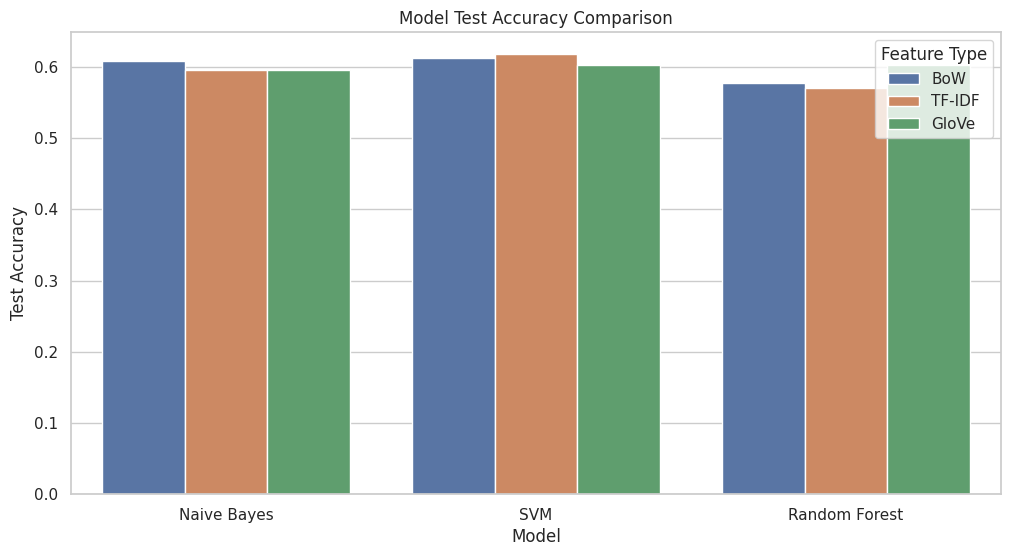

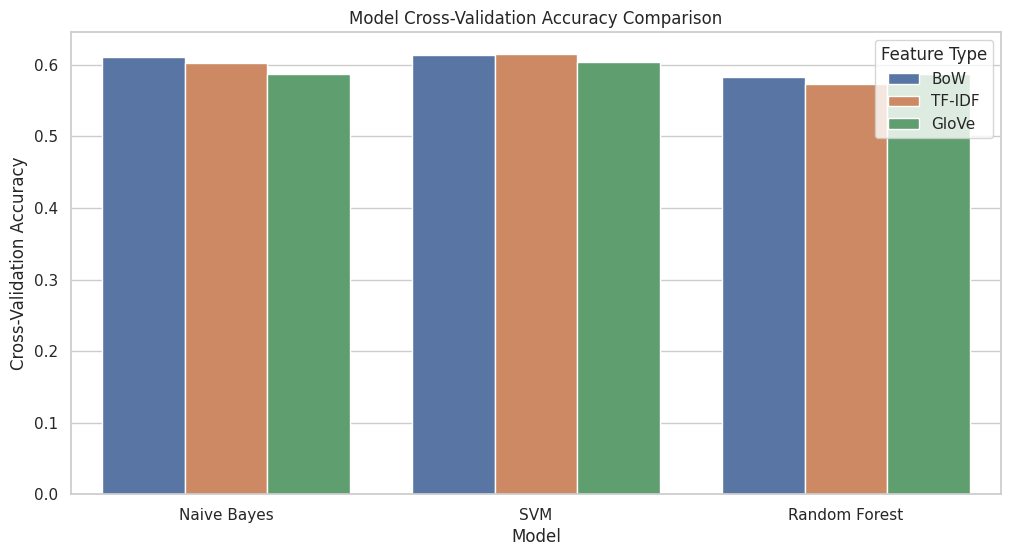

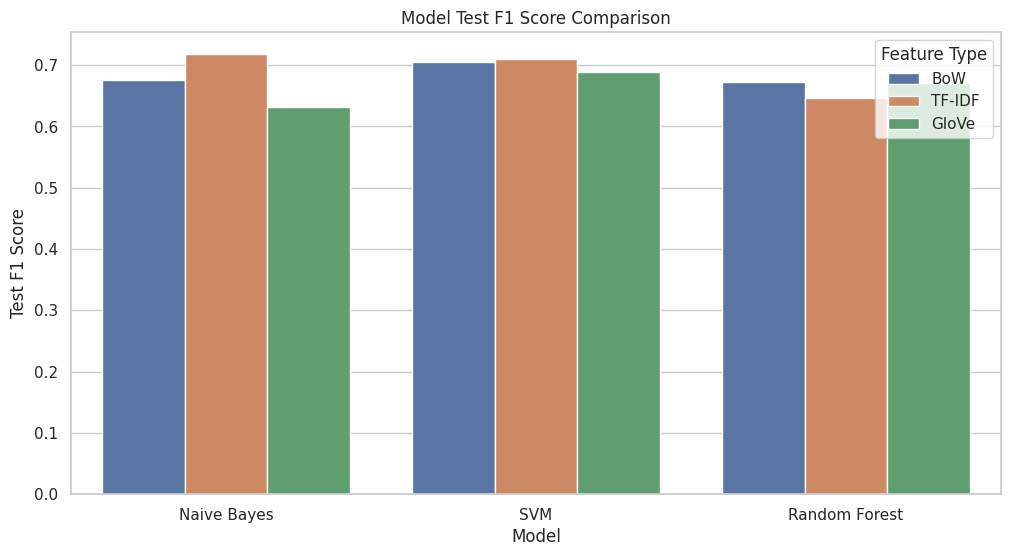

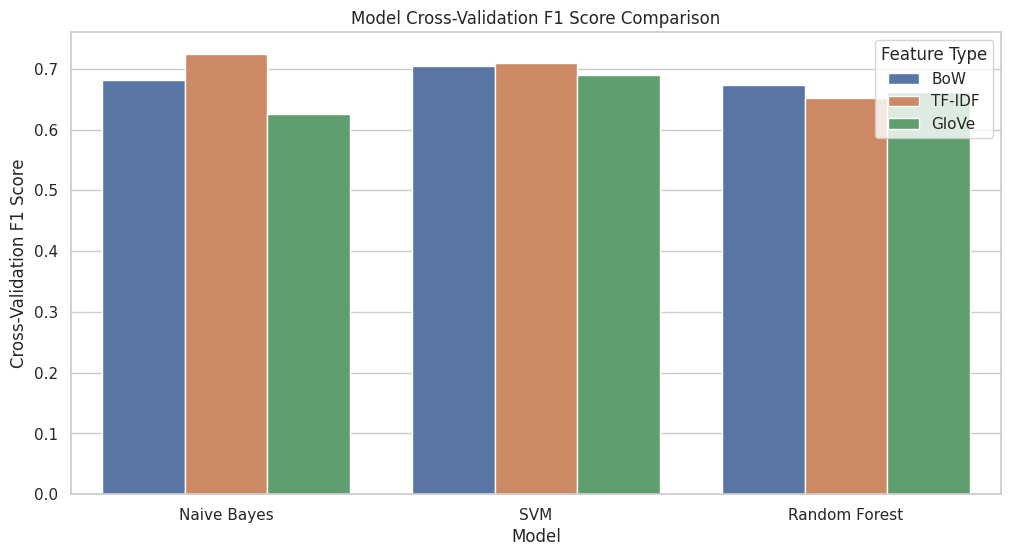

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# Plot Test Accuracy
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Model', y='Test_Accuracy', hue='Feature_Type')
plt.title('Model Test Accuracy Comparison')
plt.ylabel('Test Accuracy')
plt.legend(title='Feature Type')
plt.show()

# Plot Cross-Validation Accuracy
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Model', y='CV_Accuracy', hue='Feature_Type')
plt.title('Model Cross-Validation Accuracy Comparison')
plt.ylabel('Cross-Validation Accuracy')
plt.legend(title='Feature Type')
plt.show()

# Similarly, you can plot F1 Scores
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Model', y='Test_F1_Score', hue='Feature_Type')
plt.title('Model Test F1 Score Comparison')
plt.ylabel('Test F1 Score')
plt.legend(title='Feature Type')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Model', y='CV_F1_Score', hue='Feature_Type')
plt.title('Model Cross-Validation F1 Score Comparison')
plt.ylabel('Cross-Validation F1 Score')
plt.legend(title='Feature Type')
plt.show()